In [19]:
import numpy as np
from IPython.display import Image

In [20]:
sentence = "经常有意见分歧"
dictionaries = {'有':1,'有意见':1,'意见':1,'分歧':1,'见':1,'意':1}

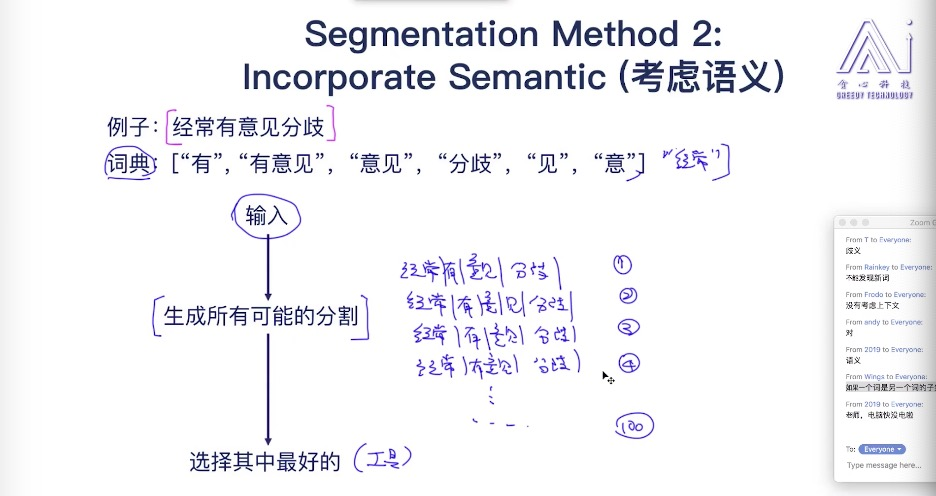

In [21]:
img_path1 = "/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/NLP训练营笔记/图片/3BFFF524-0123-4626-88D7-60B5B467299F.png"
display(Image(img_path1))

In [22]:
def forwoard_slide(original,index_,max_len = 5):
    return original[index_:index_+max_len]

def forward_test_word(text,dict_):
    char_len = len(text)
    for char_index in range(char_len,0,-1):
        temp_word = text[0:char_index]
        if temp_word in dict_:
            return temp_word

def forwoard_max_matching(original,max_len,dict_):
    result = []
    dict_ = list(dictionaries)
    n = len(original)
    for i in range(n):
        temp_text = forwoard_slide(original,i,max_len)
        temp_word = forwoard_test_word(temp_text,dict_)
        if temp_word != None:
            result.append(temp_word)
    return result

def backward_slide(original,index_,max_len = 5):
    cut = index_-max_len
    if cut < 0:
        cut = 0
    return original[cut:index_]

def backward_test_word(text,dict_):
    char_len = len(text)
    for char_index in range(char_len):
        temp_word = text[char_index:char_index+char_len]
        if temp_word in dict_:
            return temp_word

def backward_max_matching(original,max_len,dict_):
    result = []
    dict_ = list(dictionaries)
    n = len(original)
    for i in range(n-1,0,-1):
        temp_text = backward_slide(original,i)
        temp_word = backward_test_word(temp_text,dict_)
        if temp_word:
            result.append(temp_word)
    return result[::-1]

def MaxMatching(original,max_len,word_dict,modeltype="search"):
    backward = backward_max_matching(sentence,max_len,word_dict)
    forwoard = forwoard_max_matching(sentence,max_len,word_dict)
    set_backward , set_forwoard = set(backward),set(forwoard)
    if modeltype == "search":
        return set_backward | set_forwoard
    elif modeltype == 'all':
        return {"backward":set_backward,"forwoard":set_forwoard}
    else:
        return set_backward & set_forwoard

In [23]:
split_word = MaxMatching(sentence,2,dictionaries,modeltype = 'all')
split_word

{'backward': {'意', '有', '有意见'}, 'forwoard': {'分歧', '意见', '有', '见'}}

## 考虑与分词的的语意,需要语言模型
## 最简单的就是计算联合概率

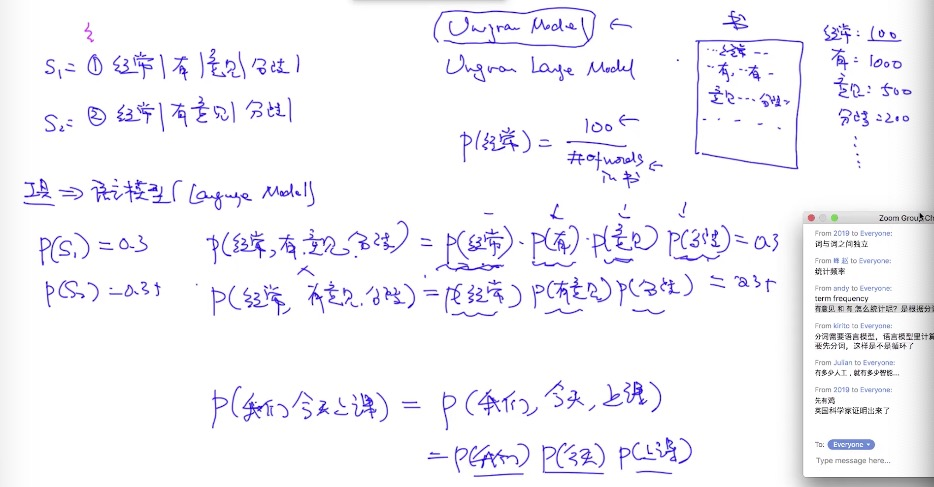

In [24]:
display(Image("/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/NLP训练营笔记/图片/F848AACF-EF57-41C0-A97B-BD5A85860452.png"))